In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv('data/Real-Data/Real_Combine.csv')

In [37]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [38]:
#chechk for null values
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [39]:
#drop null values
df.dropna(inplace=True)

In [40]:
df.shape

(1092, 9)

In [41]:
#independant featurd
x=df.iloc[:,:-1]

#Independant features
y=df.iloc[:,-1]

In [42]:
x.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [43]:
y.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

In [44]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


# Test train split

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [48]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9750972910102333


In [49]:

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.7860231600177123


In [50]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [51]:
score.mean()

0.7231314458046397

In [52]:
prediction=regressor.predict(x_test)

E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

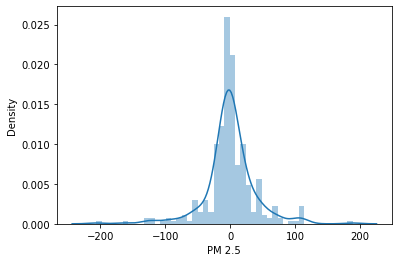

In [53]:
sns.distplot(y_test-prediction)

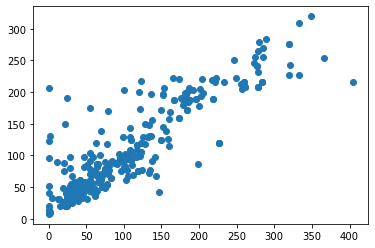

In [54]:
plt.scatter(y_test,prediction)

# Hyperparameter Tuning

In [55]:
RandomForestRegressor()

RandomForestRegressor()

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [58]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 8)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [59]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [61]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [62]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   0.9s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   0.8s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=100

[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   1.4s
[CV] END max_depth=10, max_featur

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   1.5s
[CV] END max_depth=30, m

[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=700; total time=   0.8s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=700; total time=   0.8s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=700; total time=   0.8s
[CV] END max_depth=35, max_fe

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=35, max_features=s

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.3s
[CV] END max_depth=30, max_features=

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   1.4s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   1.2s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   1.2s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   1.3s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1000; total time=   1.1s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.6s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   1.6s
[CV] END max_depth=

[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   1.9s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   1.9s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   1.9s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   1.8s
[CV] END max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   1.9s
[CV] END max_depth=25, max_fea

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [63]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [64]:
rf_random.best_score_

-1515.4246665395628

In [65]:
predictions=rf_random.predict(x_test)

E:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

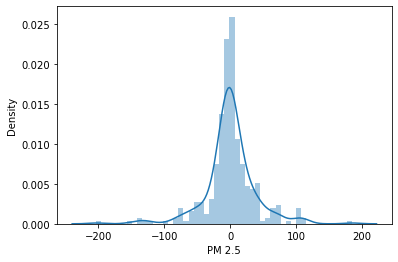

In [66]:
sns.distplot(y_test-predictions)

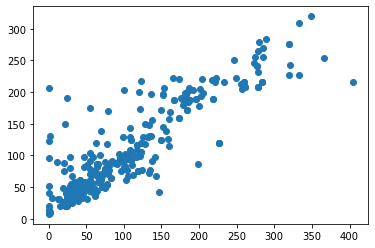

In [67]:

plt.scatter(y_test,prediction)

In [68]:
from sklearn import metrics

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 46.33073822751323
MSE: 4103.190968681488
RMSE: 64.05615480718062
